In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import chardet
from sklearn.metrics import f1_score


# Import data
with open("/content/Spam_Ham_data.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv("/content/Spam_Ham_data.csv", encoding=encoding)

# Preprocess data: Ensure all text data are strings and handle NaN values
df['content'] = df['content'].astype(str)

# Improved Labeling: Assign labels more robustly
labels = np.array([0 if label == 0 else 1 for label in df['label']])


In [2]:

# Text tokenization and sequence padding
tokenizer = Tokenizer(num_words=10000)  # Using the top 10,000 words as features
tokenizer.fit_on_texts(df['content'].tolist())
sequences = tokenizer.texts_to_sequences(df['content'].tolist())
data = pad_sequences(sequences, maxlen=500)

# Shuffle and split the data
np.random.seed(42)
indices = np.random.permutation(len(data))
data = data[indices]
labels = labels[indices]

Epoch 1/10
78/78 [==============================] - 10s 122ms/step - loss: 0.0628 - accuracy: 0.9984 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/10
78/78 [==============================] - 8s 107ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.7174e-04 - val_accuracy: 1.0000
Epoch 3/10
78/78 [==============================] - 6s 78ms/step - loss: 5.1258e-04 - accuracy: 1.0000 - val_loss: 4.5105e-04 - val_accuracy: 1.0000
Epoch 4/10
78/78 [==============================] - 8s 107ms/step - loss: 2.9245e-04 - accuracy: 1.0000 - val_loss: 3.0221e-04 - val_accuracy: 1.0000
Epoch 5/10
78/78 [==============================] - 7s 93ms/step - loss: 1.9032e-04 - accuracy: 1.0000 - val_loss: 2.2120e-04 - val_accuracy: 1.0000
Epoch 6/10
78/78 [==============================] - 5s 71ms/step - loss: 1.3432e-04 - accuracy: 1.0000 - val_loss: 1.7077e-04 - val_accuracy: 1.0000
Epoch 7/10
78/78 [==============================] - 5s 60ms/step - loss: 1.0010e-04 - accuracy: 1.0000 - val_loss:

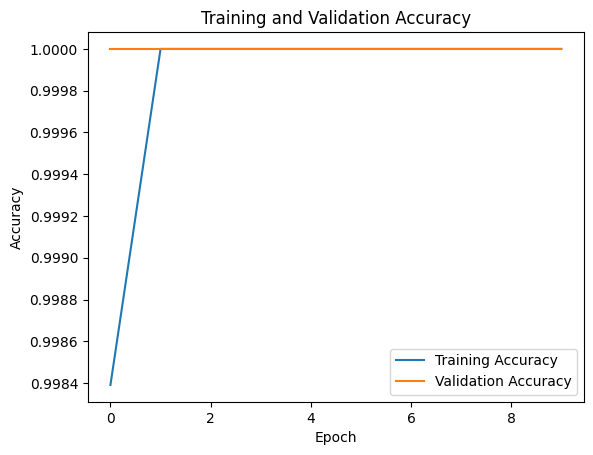

20/20 - 0s - loss: 7.9824e-05 - accuracy: 1.0000 - 56ms/epoch - 3ms/step
Training Loss: 0.0001
Training Accuracy: 1.0000
Validation Loss: 0.0001
Validation Accuracy: 1.0000
20/20 [==============================] - 0s 2ms/step
F1 Score: 1.0000


In [5]:
# Splitting the data into training and testing sets
training_samples = int(len(data) * 0.8)
validation_samples = len(data) - training_samples
texts_train, y_train = data[:training_samples], labels[:training_samples]
texts_test, y_test = data[training_samples:], labels[training_samples:]

# Building the Logistic Regression model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=500),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(texts_train, y_train, epochs=10, validation_data=(texts_test, y_test))

model.summary()

# Evaluate the model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(texts_test, y_test, verbose=2)
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Predict classes (not probabilities) with the model
y_pred = (model.predict(texts_test) > 0.5).astype("int32")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)


# Print the F1 score
print(f"F1 Score: {f1:.4f}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 16)           64        
                                                                 
 batch_normalization (Batch  (None, 500, 16)           64        
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 16)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 250, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 248, 32)           1568      
                                                                 
 batch_normalization_1 (Bat  (None, 248, 32)          

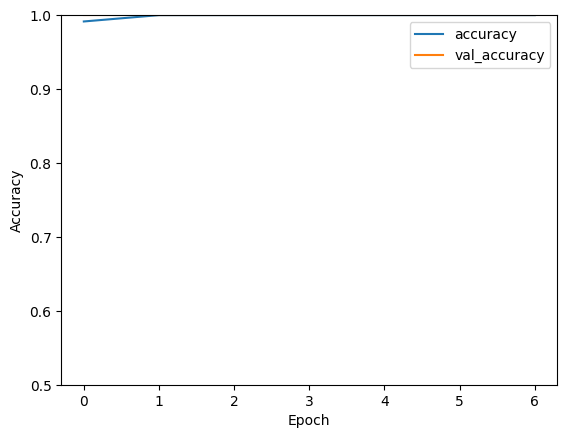

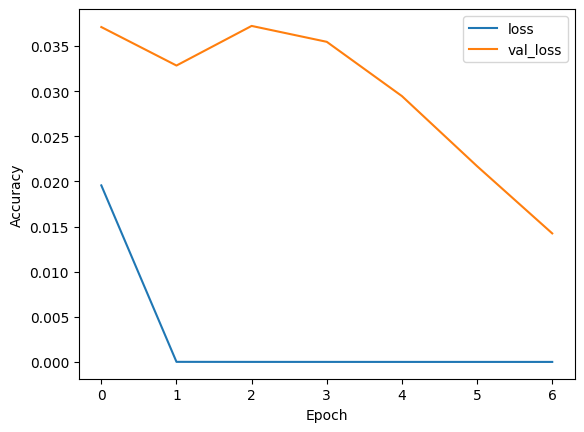

39/39 - 0s - loss: 0.0142 - accuracy: 1.0000 - 310ms/epoch - 8ms/step

CNN Test accuracy: 1.0
39/39 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1244

    accuracy                           1.00      1244
   macro avg       1.00      1.00      1.00      1244
weighted avg       1.00      1.00      1.00      1244

F1 Score: 1.0000


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Import data
df = pd.read_csv("Spam_Ham_data.csv", encoding="utf-8")

# Preprocess data
texts = df['content'].fillna('').astype(str).tolist()
labels = []
for label in df['label']:
    if label == 0:
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

# number of words used as features
max_words = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=maxlen)
y = np.array(labels)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Building CNN
model = models.Sequential()

# First Convolutional Layer
model.add(Conv1D(16, 3, activation='relu', padding='same', input_shape=(500,1)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Second Convolutional Layer
model.add(Conv1D(32, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Third Convolutional Layer
model.add(Conv1D(64, 3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(layers.Dropout(.35))

# Flatten for CNN layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Binary cross entropy because binary classification
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=7, batch_size=64)

# Accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.legend()
plt.show()
print("\n")

# Loss graph
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nCNN Test accuracy:", test_acc)

# Predict classes with the model
y_pred = (model.predict(x_test) > 0.5).astype("int")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred)

# Print  F1 score
print(f"F1 Score: {f1:.4f}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
number of texts : 5572
number of labels:  5572
Found 8920 unique words: 
data shape:  (5572, 500)
Epoch 1/10
140/140 [==============================] - 15s 104ms/step - loss: 0.3323 - accuracy: 0.8744 - val_loss: 0.1874 - val_accuracy: 0.9453
Epoch 2/10
140/140 [==============================] - 6s 46ms/step - loss: 0.0962 - accuracy: 0.9764 - val_loss: 0.0750 - val_accuracy: 0.9767
Epoch 3/10
140/140 [==============================] - 4s 26ms/step - loss: 0.0444 - accuracy: 0.9890 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 4/10
140/140 [=======================

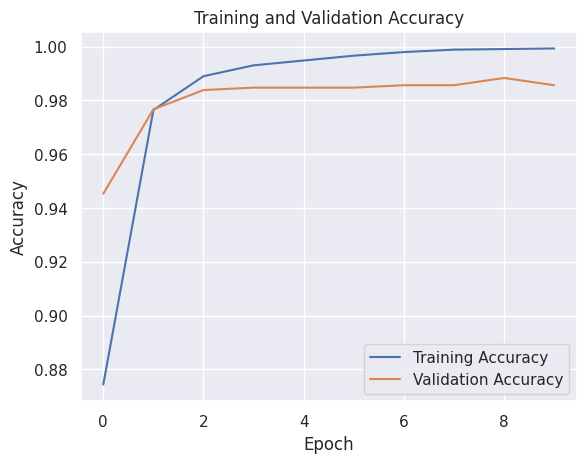

Training Loss: 0.0051
Training Accuracy: 0.9993
Validation Loss: 0.0476
Validation Accuracy: 0.9857
35/35 [==============================] - 0s 2ms/step
F1 Score: 0.9463


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
!pip install chardet
import chardet
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import f1_score


# Import data
with open("/content/spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
df = pd.read_csv("/content/spam.csv", encoding=encoding)
df.columns
df.info()

# Preprocess data
texts = df['v2'].tolist()
labels = []
for label in df['v1']:
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.random.permutation(len(data))
data = data[indices]
labels = labels[indices]

# Calculate the number of training samples
training_samples = int(len(data) * 0.8)
validation_samples = len(data) - training_samples

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]


# Building the Logistic Regression model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=500),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(texts_train, y_train, epochs=10, validation_data=(texts_test, y_test))

# Evaluate the model
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print training and validation loss and accuracy
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Generate predictions for the test set
predictions = model.predict(texts_test)
# Convert probabilities to binary predictions (0 or 1)
predictions = (predictions > 0.5).astype(int).flatten()

# Calculate F1 score using the true labels and predicted labels
f1 = f1_score(y_test, predictions)

# Print the F1 score
print(f"F1 Score: {f1:.4f}")
